[View in Colaboratory](https://colab.research.google.com/github/malinenimaurya/Deep-Learning/blob/master/vgg_resnet_inception_mobilenet_keras.ipynb)

In [4]:
import keras
import numpy as np
from keras.applications import resnet50, vgg16, inception_v3, mobilenet
import matplotlib.pyplot as plt
%matplotlib inline 

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')





  352256/17225924 [..............................] - ETA: 30s

17227776/17225924 [==============================] - 3s 0us/step


In [5]:
!wget 'http://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/92135118.jpg?itok=kp7Xksl6&resize=1100x619'

--2018-07-02 13:23:31--  http://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/92135118.jpg?itok=kp7Xksl6&resize=1100x619
Resolving images.mentalfloss.com (images.mentalfloss.com)... 50.22.188.78
Connecting to images.mentalfloss.com (images.mentalfloss.com)|50.22.188.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57641 (56K) [image/jpeg]
Saving to: ‘92135118.jpg?itok=kp7Xksl6&resize=1100x619.2’

92135118.jpg?itok=k 100%[===================>]  56.29K  --.-KB/s    in 0.02s   

2018-07-02 13:23:31 (3.38 MB/s) - ‘92135118.jpg?itok=kp7Xksl6&resize=1100x619.2’ saved [57641/57641]



PIL image size (224, 224)


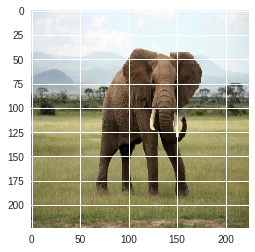

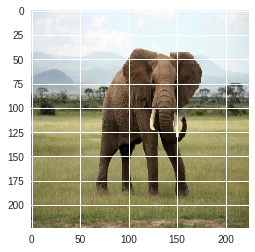

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
Predicted: [('n02504458', 'African_elephant', 0.59714276), ('n01871265', 'tusker', 0.35688254), ('n02504013', 'Indian_elephant', 0.0458524)]


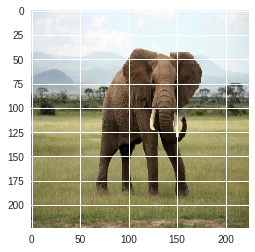

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
img_path = '92135118.jpg?itok=kp7Xksl6&resize=1100x619'
# load an image in PIL format
original = load_img(img_path, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
preds = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
print('Predicted:', decode_predictions(preds, top=3)[0])

